# **EDA & Preprocessing**

## **Objective**
The purpose of this notebook is to perform **Exploratory Data Analysis (EDA)** and prepare the dataset for further modeling. The dataset contains information on credit card transactions, with a focus on detecting fraudulent transactions. The key goals in this notebook are:

- Understand the structure and distribution of the data.
- Identify and handle issues like class imbalance and feature scaling.
- Save the processed dataset for subsequent modeling steps.

---

## **Key Steps**

### 1. **Data Loading**
- Load the dataset and check for null values, duplicates, and basic data statistics.

### 2. **Exploratory Data Analysis**
- Visualize the distributions of key features like `Time` and `Amount`.
- Analyze the class distribution and correlations between features.

### 3. **Preprocessing**
- Scale the `Time` and `Amount` columns to align with the PCA-transformed features.
- Handle class imbalance by creating a balanced dataset using **Random Under-Sampling**.

### 4. **Output**
- Save the processed dataset to the `Data` folder for use in subsequent notebooks.

---

## **Dataset Overview**
The dataset consists of the following:
- **Columns:** 31 (28 PCA-transformed features + `Time`, `Amount`, and `Class`).
- **Target Variable (`Class`):** Binary (0: Non-Fraud, 1: Fraud).
- **Class Distribution:** Imbalanced with only 0.17% fraudulent transactions.

---

In [14]:
# Import necessary libraries
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download the dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

# Load data into Pandas DataFrame
file_path = path + '/creditcard.csv'  # Adjust filename if necessary
df = pd.read_csv(file_path)

# Save the dataset into the 'Data' folder
save_path = '../Data/creditcard.csv'  # Adjust relative path as needed
df.to_csv(save_path, index=False)

# Confirm save
print(f"Dataset saved to: {save_path}")

Path to dataset files: C:\Users\mattj\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3
Dataset saved to: ../Data/creditcard.csv


In [25]:
# Dataset Shape
print("Dataset Shape:", df.shape)

Dataset Shape: (284807, 31)


In [26]:
# Column Information
print("\nColumn Information:")
print(df.info())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [27]:
# First 5 Rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [28]:
# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum().max())

Missing Values in Dataset:
0


In [29]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 1081


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

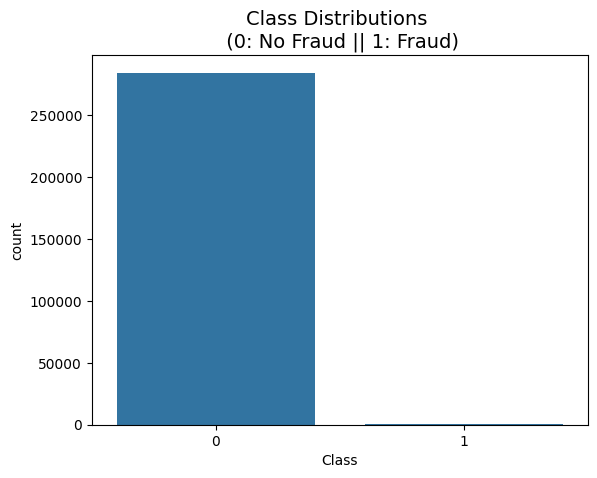

In [30]:
# Visualize Class Distribution
sns.countplot(df, x= 'Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

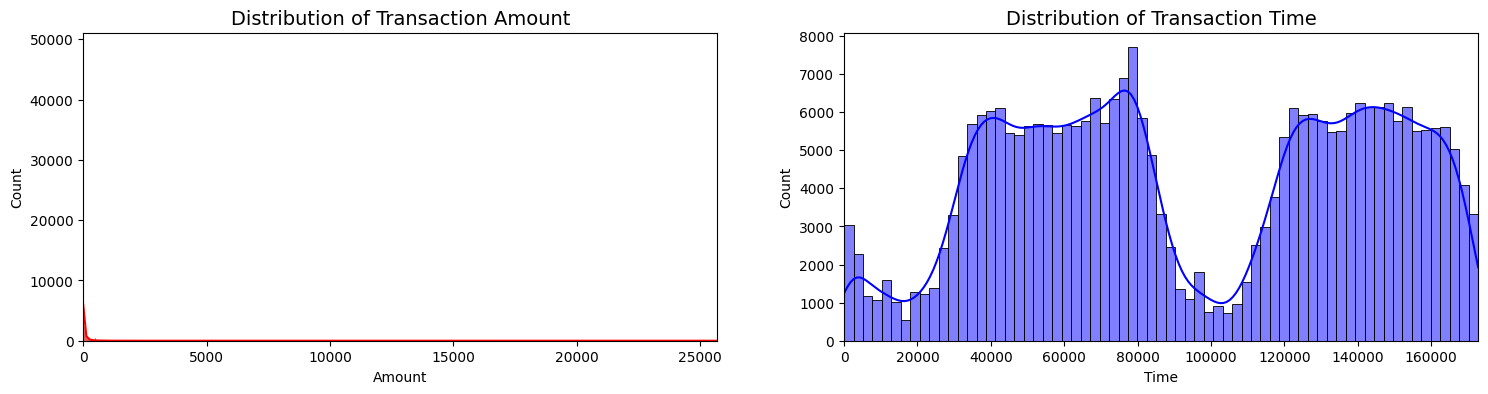

In [31]:
# Visualize 'Amount' and 'Time' distributions
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Distribution of Amount
sns.histplot(df['Amount'], ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])

# Distribution of Time
sns.histplot(df['Time'], ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df['Time']), max(df['Time'])])

plt.show()

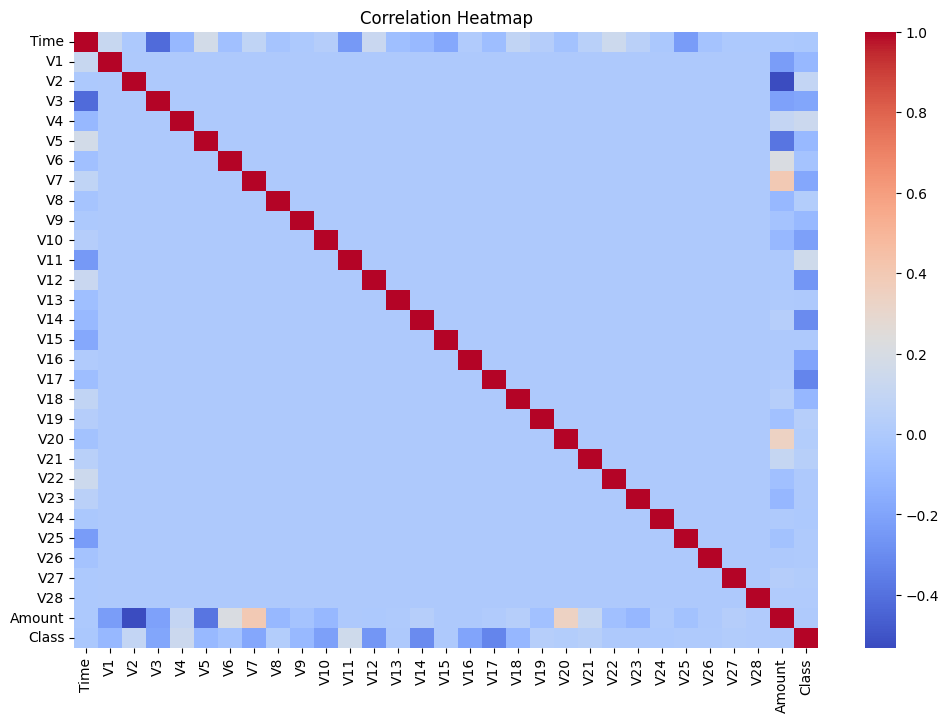

In [32]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

### Findings Summary

**1. Class Imbalance:**  
The dataset is highly imbalanced, with 99.83% of the transactions being legitimate and only 0.17% being fraudulent. Using the imbalanced dataset can lead to overfitting, where models assume most transactions are non-fraud and fail to detect patterns indicative of fraud.

**2. Feature Scaling Needs:**  
- The `Time` and `Amount` features are not PCA-transformed, unlike the other features. These need to be scaled to align numerically with the PCA-transformed features for meaningful analysis.

**3. Evaluation Metric:**  
Accuracy alone is not a reliable metric due to the extreme class imbalance. Instead, AUPRC (Area Under the Precision-Recall Curve) is recommended for measuring performance, as it better accounts for the minority class.

**4. Splitting the Data:**  
The original dataset must be split into training and testing sets before implementing sampling techniques (e.g., Random Under-Sampling or SMOTE). This ensures that models trained on sampled data can still be tested against the original dataset to evaluate generalizability.

**5. Random Under-Sampling:**  
Random Under-Sampling is used to balance the dataset by reducing the number of legitimate transactions to match the number of fraudulent ones. While this creates a 50/50 balanced subset, it risks information loss, potentially affecting model accuracy. The data is shuffled after sampling to ensure randomization.


In [33]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [34]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


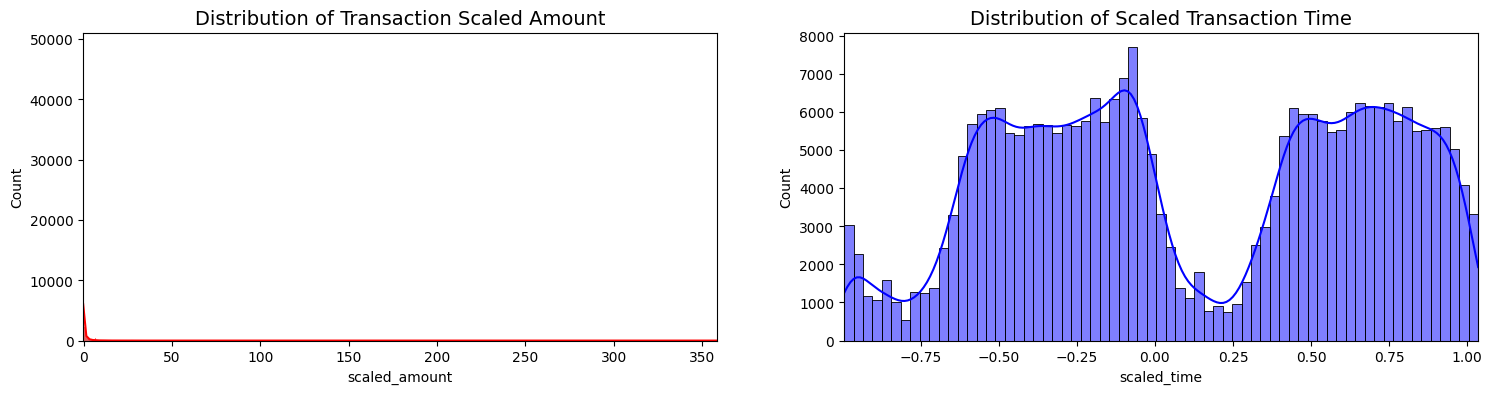

In [35]:
# Visualize 'Scaled Amount' and 'Scaled Time' distributions
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Distribution of Scaled Amount
sns.histplot(df['scaled_amount'], ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Scaled Amount', fontsize=14)
ax[0].set_xlim([min(df['scaled_amount']), max(df['scaled_amount'])])

# Distribution of Scaled Time
sns.histplot(df['scaled_time'], ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Scaled Transaction Time', fontsize=14)
ax[1].set_xlim([min(df['scaled_time']), max(df['scaled_time'])])

plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [37]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
156571,-0.206246,0.278704,-0.739732,1.670518,-0.989853,-0.905831,0.842932,-1.809562,1.439506,-0.343736,...,0.055166,0.016820,0.680392,-0.184614,0.020610,-0.243810,0.032431,0.296615,0.093193,0
88876,-0.293440,-0.262715,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,...,-0.067712,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1
284655,-0.294977,1.033342,0.105596,0.978336,-0.522443,-0.748656,1.246035,-0.232929,0.853704,0.063163,...,0.065459,-0.302004,-0.730980,0.039619,0.129328,-0.402811,0.120912,0.223924,0.071273,0
63634,1.089779,-0.398078,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,...,0.816652,0.926157,-0.817706,-0.150434,-0.039383,0.485640,-0.264325,1.159690,0.232758,1
76555,1.836931,-0.329750,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,...,-0.614719,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1


In [38]:
# Save the dataset into the 'Data' folder
save_path = '../Data/adjusted_creditcard.csv'  # Adjust relative path as needed
new_df.to_csv(save_path, index=False)

# Confirm save
print(f"Dataset saved to: {save_path}")

Dataset saved to: ../Data/adjusted_creditcard.csv


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


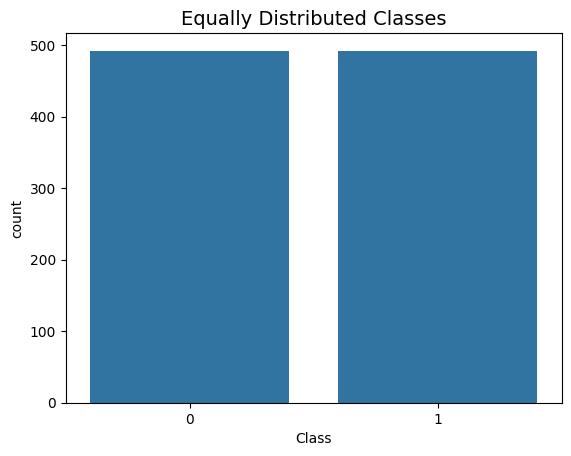

In [39]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data= new_df, x ='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()